In [99]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Exercise 1 - Generated Quantities Block

In [100]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [101]:
#F-number of letters in first name (F=5)
F = 5
L = 6
samples = gen_quant.sample(data={'M':F},
                            fixed_param=True,
                            iter_sampling=1000,
                            iter_warmup=0,
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [102]:
samples.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0,NaN,0,0.0,0,0.0,NaN,NaN,NaN
lambda,97,2.3,71,8.2,83,230.0,940.0,120000.0,1.0
y_sim[1],96,2.4,72,8.0,83,231.0,937.0,117133.0,1.0
y_sim[2],97,2.3,72,8.0,84,233.0,940.0,117547.0,1.0
y_sim[3],97,2.3,72,8.0,85,231.0,951.0,118930.0,1.0
y_sim[4],97,2.3,72,8.0,84,233.0,945.0,118093.0,1.0
y_sim[5],96,2.3,72,8.0,83,234.0,945.0,118147.0,1.0


In [124]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,37.8015,34.0,37.0,35.0,50.0,40.0
1,0.0,0.0,45.3258,45.0,50.0,52.0,41.0,47.0
2,0.0,0.0,103.8980,103.0,107.0,110.0,95.0,111.0
3,0.0,0.0,45.5604,41.0,40.0,50.0,50.0,39.0
4,0.0,0.0,88.4262,87.0,83.0,96.0,84.0,83.0


array([[<AxesSubplot:title={'center':'y_sim[5]'}>]], dtype=object)

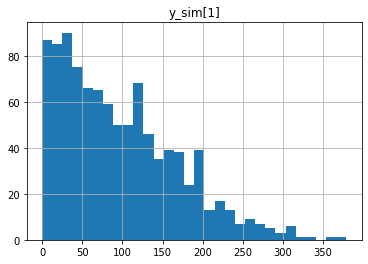

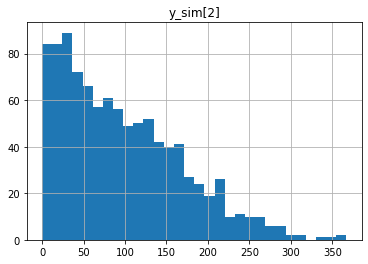

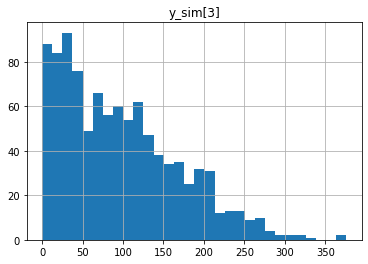

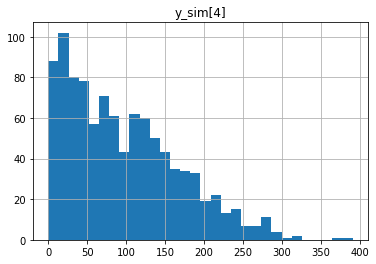

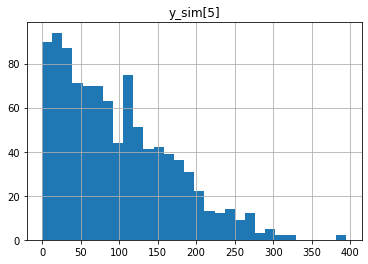

In [127]:
df.hist(column='y_sim[1]', bins=30)
df.hist(column='y_sim[2]', bins=30)
df.hist(column='y_sim[3]', bins=30)
df.hist(column='y_sim[4]', bins=30)
df.hist(column='y_sim[5]', bins=30)

array([[<AxesSubplot:title={'center':'lambda'}>]], dtype=object)

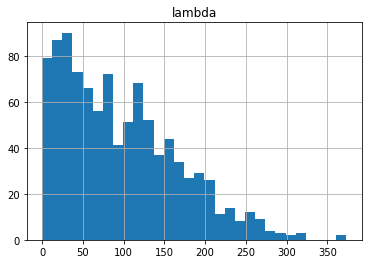

In [128]:
df.hist(column='lambda', bins=30)

Exercise 2 - Constraints on the data

In [106]:
bern1 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [107]:
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [108]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed2000 [ 90%]  (Sampling)

chain 2 |██████████| 00:00 Sampling completed


chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


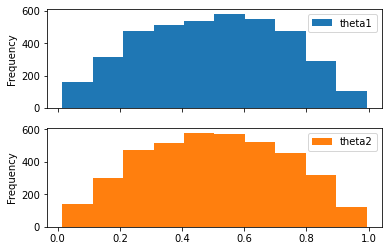

In [109]:
theta1 = samp_bern1.stan_variable('theta')
theta2 = samp_bern2.stan_variable('theta')
df = pd.DataFrame({'theta1': theta1, 'theta2':theta2})
df.plot.hist(subplots=True)
plt.show()

Exercise 3 - Constraints on parameters

a) unconstrained declaration for theta(code_4.stan)

In [110]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/agata/PycharmProjects/test1/samples/code_4-20220314203836_1.csv, /home/agata/PycharmProjects/test1/samples/code_4-20220314203836_2.csv, /home/agata/PycharmProjects/test1/samples/code_4-20220314203836_3.csv, /home/agata/PycharmProjects/test1/samples/code_4-20220314203836_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |███       | 00:00 Iteration: 1900 / 7000 [ 27%]  (Sampling)

chain 3 |███▌      | 00:00 Iteration: 2300 / 7000 [ 32%]  (Sampling)
chain 2 |███▍      | 00:00 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |██████    | 00:00 Iteration: 4100 / 7000 [ 58%]  (Sampling)

chain 3 |████████▊ | 00:00 Iteration: 6000 / 7000 [ 85%]  (Sampling)


chain 4 |████▊     | 00:00 Iteration: 3200 / 7000 [ 45%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/agata/PycharmProjects/test1/samples/code_4-20220314203844_1.csv, /home/agata/PycharmProjects/test1/samples/code_4-20220314203844_2.csv, /home/agata/PycharmProjects/test1/samples/code_4-20220314203844_3.csv, /home/agata/PycharmProjects/test1/samples/code_4-20220314203844_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

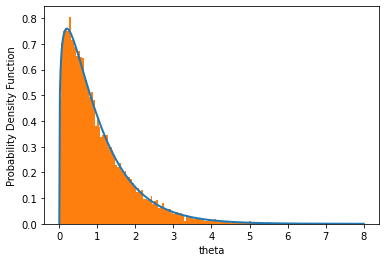

In [131]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25)

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
theta_uc = out_gamma1.stan_variable('theta')
plt.hist(theta_uc, bins=160, density = True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

b) constrained declaration for theta (code_5.stan)

In [112]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |████▋     | 00:00 Iteration: 3100 / 7000 [ 44%]  (Sampling)
chain 2 |████▌     | 00:00 Iteration: 3000 / 7000 [ 42%]  (Sampling)

chain 3 |███▉      | 00:00 Iteration: 2500 / 7000 [ 35%]  (Sampling)


chain 1 |█████████▍| 00:00 Iteration: 6500 / 7000 [ 92%]  (Sampling)A

chain 3 |███████▊  | 00:00 Iteration: 5300 / 7000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       

chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/agata/PycharmProjects/test1/samples/code_5-20220314203838_1.csv, /home/agata/PycharmProjects/test1/samples/code_5-20220314203838_2.csv, /home/agata/PycharmProjects/test1/samples/code_5-20220314203838_3.csv, /home/agata/PycharmProjects/test1/samples/code_5-20220314203838_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |█████▊    | 00:00 Iteration: 3900 / 7000 [ 55%]  (Sampling)
chain 2 |████▋     | 00:00 Iteration: 3100 / 7000 [ 44%]  (Sampling)

chain 3 |████▊     | 00:00 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 4 |███▉      | 00:00 Iteration: 2500 / 7000 [ 35%]  (Sampling)
chain 2 |█████████▌| 00:00 Iteration: 6600 / 7000 [ 94%]  (Sampling)

chain 3 |█████████▋| 00:00 Iteration: 6700 / 7000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/agata/PycharmProjects/test1/samples/code_5-20220314203846_1.csv, /home/agata/PycharmProjects/test1/samples/code_5-20220314203846_2.csv, /home/agata/PycharmProjects/test1/samples/code_5-20220314203846_3.csv, /home/agata/PycharmProjects/test1/samples/code_5-20220314203846_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

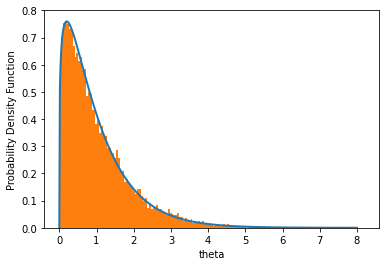

In [132]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25)

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
theta_wc = out_gamma2.stan_variable('theta')
plt.hist(theta_wc, bins=160, density = True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Exercise 4 - functions and different functionalities of stan

In [114]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 5# number of letters in the first name
L = 6# number of letters in the last name
y0 = 1# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [133]:
tunes.draws_pd().head()

,lp__,accept_stat__,sigma
0,0.0,0.0,2.13523


Exercise 5 - different methods of defining models

In [116]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [117]:
model_log_target = CmdStanModel(stan_file='code_8.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [118]:
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [119]:
F=5
data = {'N': F}
seed = 15011999#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 2 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 3 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       A
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                     

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 2 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 3 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [120]:
F=5
data = {'N': F}
seed = 15011999
result_2 = model_log_target.sample(data=data, seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 3 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 2 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       A
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 1 |▍         | 00:00 Statusion: 1300 / 2000 [ 65%]  (Sampling)


chain 4 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |██████████| 00:00 Sampling completed2000 [ 70%]  (Sampling)
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       



chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [121]:
F=5
data = {'N': F}
seed = 15011999
result_3 = model_log_target_ind.sample(data=data, seed=seed)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 3 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 2 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       A
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                     

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 2 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 3 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 4 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       


chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


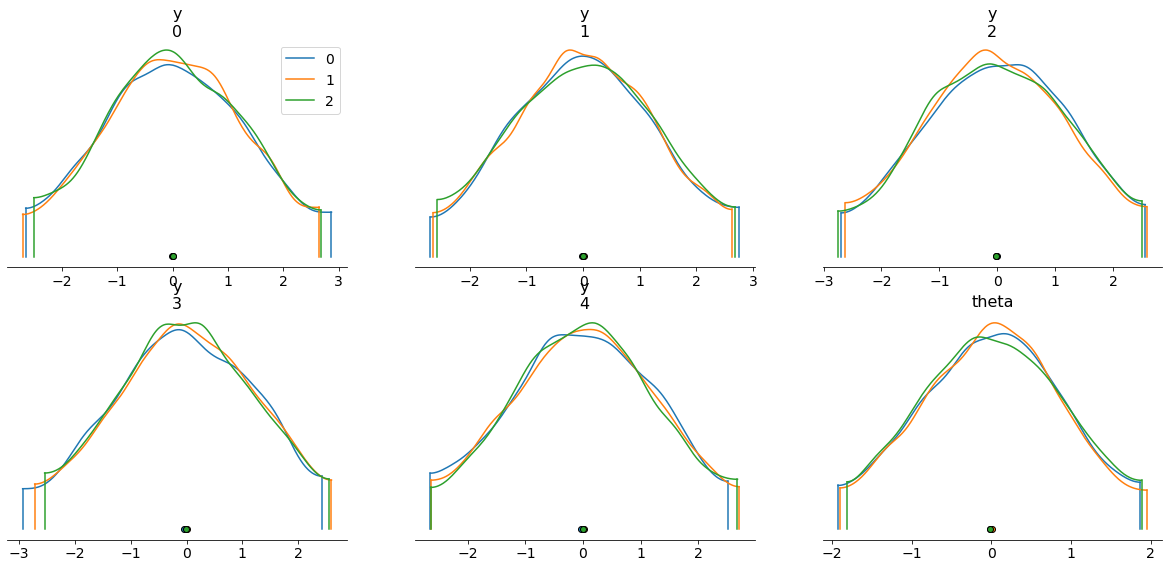

In [134]:
az.plot_density([result_1,result_2,result_3])
plt.show()

Exercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


array([[<AxesSubplot:title={'center':'mean_y'}>]], dtype=object)

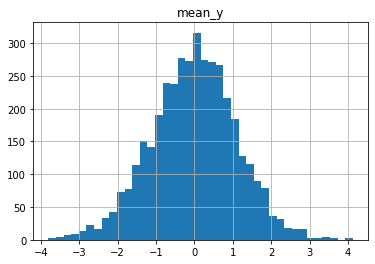

In [136]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variableŌ

df_6 = mean_of_y.draws_pd()
df_6.hist(column = 'mean_y',bins =40)